In [5]:
%matplotlib ipympl
from EBM import *
from plotting import *
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

/Users/cfn18/Documents/PhD-Work/Third-Year/Instanton-Work/L96-EBM-Instanton-Cleaned-Up/EBM


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


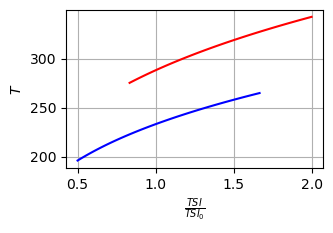

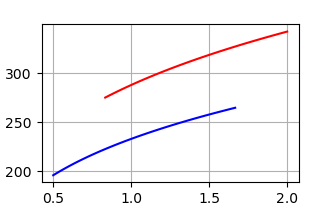

In [18]:
# Function for Finding Attractors
def find_attractors(TSI):
    "For a specified TSI, finds the attractors of the 0D EBM."

    #Setup integrators
    sb_integrator = EBM_Integrator(T_init=200, TSI=TSI)
    w_integrator = EBM_Integrator(T_init=300, TSI=TSI)

    #Run Integrations to find attractors
    attractor_list = []
    for integrator in [sb_integrator, w_integrator]:
        looker =  EBMTrajectoryObserver(integrator)
        make_observations(integrator, looker, 500, 0.1, noprog=True)
        attractor_list.append(looker.observations.Temp.isel(time=-1).item())
    return np.unique(np.array(attractor_list).round(decimals=3))

def attractor_TSI_search(TSIs):
    "Search for attractors for different TSI Values"

    # Initialise Lists
    sb_TSIs = []
    sb_attractors = []
    w_TSIs = []
    w_attractors = []

    for TSI in tqdm(TSIs):
        attractors = find_attractors(TSI)
        if len(attractors) == 2: # Bistable case
            sb_TSIs.append(TSI)
            sb_attractors.append(np.min(attractors))
            w_TSIs.append(TSI)
            w_attractors.append(np.max(attractors))
        elif attractors[0] < 270:
            sb_TSIs.append(TSI)
            sb_attractors.append(np.min(attractors))
        elif attractors[0] > 270:
            w_TSIs.append(TSI)
            w_attractors.append(np.min(attractors))

    return [(sb_TSIs, sb_attractors), (w_TSIs, w_attractors)]

def plot_bifurcation_diagram(attractor_info, fax=None):
    
    #Unpack attractor info
    sb_TSIs, sb_attractors = attractor_info[0]
    w_TSIs, w_attractors = attractor_info[1]   

    #Interpolate on to grid
    w_TSI_grid = np.linspace(min(w_TSIs), max(w_TSIs), 100)
    sb_TSI_grid = np.linspace(min(sb_TSIs), max(sb_TSIs), 100)
    w_function = interp1d(w_TSIs, w_attractors, kind='cubic')
    sb_function = interp1d(sb_TSIs, sb_attractors, kind='cubic')    

    # Make Plot
    if fax is None:
        fax = init_2d_fax()
    fig, ax = fax
    ax.plot(w_TSI_grid/1367, w_function(w_TSI_grid), c='r')
    ax.plot(sb_TSI_grid/1367, sb_function(sb_TSI_grid), c='b')
    return fax

def make_bifrucation_diagram(TSIs, fax=None):
    "Computes attractors and plots bifurcation diagram."
    attractor_info = attractor_TSI_search(TSIs)
    return plot_bifurcation_diagram(attractor_info, fax=fax)

# Search for attractors for different TSI Values
TSIs = 1367 * np.linspace(0.5, 2, 10)
fig, ax = make_bifrucation_diagram(TSIs)
ax.set_xlabel('$\\frac{TSI}{TSI_{0}}$')
ax.set_ylabel('$T$')
fig